# Практическая работа №6
## Тема: «Алгоритмы кластеризации. K-средних (K-means)»
### Выполнил студент: Кондратов Данил ПКТб-21-1
#### ВАРИАНТ: (ваш dataset [название, ссылка])

### K-средних (K-means)

Алгоритм K-means — это один из наиболее популярных методов кластеризации, который используется для группировки данных на основе их сходства. Кластеризация — это процесс разделения набора данных на группы или кластеры, такие что объекты в одной группе более похожи друг на друга, чем на объекты в других группах.

**Основные принципы работы K-means:**
Инициализация: Алгоритм начинается с выбора K случайных точек в пространстве данных, которые будут служить начальными центроидами кластеров.

**Назначение:** Каждая точка данных назначается кластеру, ближайшему к ней по евклидовому расстоянию. Это означает, что каждая точка принадлежит к кластеру, центроид которого находится ближе всего к ней.
Обновление: После того как все точки были назначены кластерам, центроиды кластеров пересчитываются как среднее значение всех точек внутри каждого кластера.

**Итерация:** Шаги назначения и обновления повторяются до тех пор, пока центроиды кластеров не перестанут изменяться (или не будет достигнуто максимальное количество итераций).

**Преимущества K-means:**
Простота: Алгоритм легко понимать и реализовать.
Эффективность: Работает быстро, особенно на больших наборах данных.
Скалируемость: Может быть применен к большим наборам данных.

**Недостатки K-means:**
Необходимость выбора K: Количество кластеров K должно быть заранее определено, что может быть сложно.
Чувствительность к начальным центроидам: Результаты могут сильно зависеть от начальных значений центроидов.
Работает только с числовыми данными: Не может быть применен к категориальным данным напрямую.

**Применение K-means:**
K-means широко используется в различных областях, включая анализ данных, машинное обучение, компьютерное зрение и многие другие. Он может быть использован для сегментации клиентов, кластеризации изображений, анализа временных рядов и многого другого.

<img text align="left"  src="image.png" alt="картинка">

In [7]:
import pandas as pd

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df
# Предварительная обработка данных

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Удаление пропущенных значений
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [9]:
# Преобразование категориальных переменных в числовые
df = pd.get_dummies(df, drop_first=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",...,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,7,0,1,54.0,0,0,51.8625,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10,11,1,3,4.0,1,1,16.7000,False,False,False,...,False,False,False,False,False,False,True,False,False,True
11,12,1,1,58.0,0,0,26.5500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,False,False,False,...,False,False,False,False,False,False,False,False,False,True
872,873,0,1,33.0,0,0,5.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
879,880,1,1,56.0,0,1,83.1583,False,False,False,...,False,False,False,False,False,False,False,False,False,False
887,888,1,1,19.0,0,0,30.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
# Выбор признаков
features = ['Age', 'Sex_male', 'Pclass']
X = df[features]

from sklearn.cluster import KMeans

# Определение количества кластеров
k = 3

In [11]:
# Создание и обучение модели K-means
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [12]:
# Получение меток кластеров для каждого пассажира
labels = model.labels_

# Добавление меток кластеров в исходный датафрейм
df['Cluster'] = labels

# Вывод первых нескольких строк датафрейма с метками кластеров
print(df.head())

    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
1             2         1       1  38.0      1      0  71.2833   
3             4         1       1  35.0      1      0  53.1000   
6             7         0       1  54.0      0      0  51.8625   
10           11         1       3   4.0      1      1  16.7000   
11           12         1       1  58.0      0      0  26.5500   

    Name_Allison, Master. Hudson Trevor  Name_Allison, Miss. Helen Loraine  \
1                                 False                              False   
3                                 False                              False   
6                                 False                              False   
10                                False                              False   
11                                False                              False   

    Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  ...  Cabin_F G63  \
1                                               False   

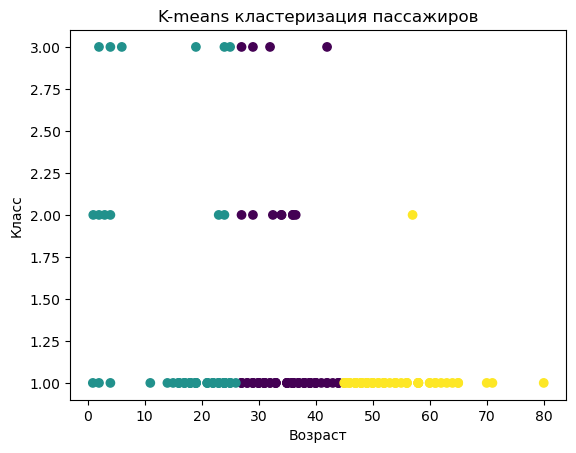

In [13]:
import matplotlib.pyplot as plt

# Визуализация кластеров
plt.scatter(df['Age'], df['Pclass'], c=labels, cmap='viridis')
plt.xlabel('Возраст')
plt.ylabel('Класс')
plt.title('K-means кластеризация пассажиров')
plt.show()

Для оценки модели кластеризации, такой как K-means, обычно используются метрики, связанные с внутренней структурой кластеров, такие как внутрикластерное расстояние (внутрикластерная дисперсия) и междукластерное расстояние. Однако, если ваша задача включает в себя классификацию или предсказание, вы можете использовать метрики, такие как точность (accuracy), полнота (recall), F1-мера (F1 score) и другие, но они будут применяться к классификационной модели, построенной на основе кластеров, а не к самому алгоритму K-means.

Для оценки модели K-means, вы можете использовать следующие метрики:

**Внутрикластерное расстояние**
Внутрикластерное расстояние измеряет среднее расстояние между точками внутри одного кластера. Меньшее внутрикластерное расстояние указывает на то, что точки внутри кластера более схожи друг с другом.

~~~python
from sklearn.metrics import silhouette_score

# Вычисление внутрикластерного расстояния
inertia = model.inertia_
print(f"Inertia: {inertia}")

# Вычисление коэффициента силуэта
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")
~~~

**Оценка модели с использованием метрик кластеризации**

Внутрикластерное расстояние
Внутрикластерное расстояние измеряет среднее расстояние между точками внутри одного кластера. Меньшее внутрикластерное расстояние указывает на то, что точки внутри кластера более схожи друг с другом.

In [14]:
# Вычисление внутрикластерного расстояния
inertia = model.inertia_
print(f"Inertia: {inertia}")

Inertia: 7851.680251575955


Внутрикластерное расстояние — это метрика, используемая в алгоритме K-means и других методах кластеризации для оценки качества кластеризации. Она измеряет среднее расстояние между точками внутри одного кластера. В контексте K-means, внутрикластерное расстояние вычисляется как сумма квадратов расстояний от каждой точки внутри кластера до его центроида, делённая на количество точек в кластере.

Формула внутрикластерного расстояния:
Для кластера с центроидом в точке (C) и (n) точек внутри кластера, внутрикластерное расстояние (D) может быть вычислено по следующей формуле:

$$[D = \frac{1}{n} \sum_{i=1}^{n} d(x_i, C)^2]$$


где (d(x_i, C)) — это евклидово расстояние от точки (x_i) до центроида (C).

Характеристики внутрикластерного расстояния:
Меньшее внутрикластерное расстояние указывает на лучшее качество кластеризации: Если точки внутри кластера ближе друг к другу, чем к точкам в других кластерах, это указывает на то, что кластеры хорошо сгруппированы.
Влияние на выбор количества кластеров (K): Внутрикластерное расстояние может быть использовано для определения оптимального количества кластеров. Обычно, когда добавляется новый кластер, внутрикластерное расстояние увеличивается. Поэтому, можно выбрать количество кластеров, при котором внутрикластерное расстояние достигает минимума.
Чувствительность к начальным центроидам: Внутрикластерное расстояние может сильно зависеть от начальных значений центроидов. Если начальные центроиды выбраны неудачно, алгоритм может застрять в локальном минимуме и не найти оптимальное разбиение данных.
Внутрикластерное расстояние является одной из ключевых метрик для оценки качества кластеризации, выполненной с помощью алгоритма K-means. Однако, оно не всегда является единственной метрикой, которую следует рассматривать, особенно в случаях, когда данные имеют сложную структуру или когда важны междукластерные расстояния.

In [16]:
from sklearn.metrics import silhouette_score

# Вычисление коэффициента силуэта
silhouette = silhouette_score(X, model.labels_)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.5437995542544196


**Коэффициент силуэта (Silhouette Coefficient)** — это метрика, используемая для оценки качества кластеризации. Он измеряет, насколько хорошо каждая точка соответствует своему кластеру по сравнению с другими кластерами. Значение коэффициента силуэта варьируется от -1 до 1, где более высокие значения указывают на лучшее соответствие.

Формула коэффициента силуэта:
Для каждой точки (x_i) внутри кластера, коэффициент силуэта (s(x_i)) вычисляется по следующей формуле:

$$[s(x_i) = \frac{b(x_i) - a(x_i)}{max(a(x_i), b(x_i))}]$$

где:

(a(x_i)) — это среднее расстояние от точки (x_i) до всех точек в том же кластере.
(b(x_i)) — это среднее расстояние от точки (x_i) до всех точек в ближайшем кластере.
Коэффициент силуэта для всего набора данных вычисляется как среднее значение коэффициента силуэта для всех точек:

$$[S = \frac{1}{n} \sum_{i=1}^{n} s(x_i)]$$

где (n) — количество точек в данных.

**Характеристики коэффициента силуэта:**
Меньшее значение коэффициента силуэта указывает на лучшее качество кластеризации: Если точки внутри кластера ближе друг к другу, чем к точкам в других кластерах, и наоборот, то коэффициент силуэта будет ближе к 1.
Чувствительность к выбору количества кластеров: Коэффициент силуэта может быть использован для определения оптимального количества кластеров. Обычно, когда добавляется новый кластер, коэффициент силуэта увеличивается. Поэтому, можно выбрать количество кластеров, при котором коэффициент силуэта достигает максимума.

Коэффициент силуэта является полезной метрикой для оценки качества кластеризации, поскольку он учитывает как внутрикластерное расстояние, так и междукластерное расстояние, предоставляя более полную картину качества кластеризации.

### Задание 1. Загрузить данные из dataset "Ирисы"  и изучить (исследовать) dataset

In [24]:
import numpy as np
import pandas as pd

In [25]:
iris = "Iris.xlsx"
data = pd.read_excel(iris)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
data = data.dropna()
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
data = pd.get_dummies(data, drop_first=True)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,False,False
1,2,4.9,3.0,1.4,0.2,False,False
2,3,4.7,3.2,1.3,0.2,False,False
3,4,4.6,3.1,1.5,0.2,False,False
4,5,5.0,3.6,1.4,0.2,False,False
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,True
146,147,6.3,2.5,5.0,1.9,False,True
147,148,6.5,3.0,5.2,2.0,False,True
148,149,6.2,3.4,5.4,2.3,False,True


In [30]:
features = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
X = data[features]

from sklearn.cluster import KMeans

k = 4

In [31]:
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [33]:
# Получение меток кластеров для каждого пассажира
labels = model.labels_

# Добавление меток кластеров в исходный датафрейм
data['Cluster'] = labels

# Вывод первых нескольких строк датафрейма с метками кластеров
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3   4            4.6           3.1            1.5           0.2   
4   5            5.0           3.6            1.4           0.2   

   Species_Iris-versicolor  Species_Iris-virginica  Cluster  
0                    False                   False        1  
1                    False                   False        1  
2                    False                   False        1  
3                    False                   False        1  
4                    False                   False        1  


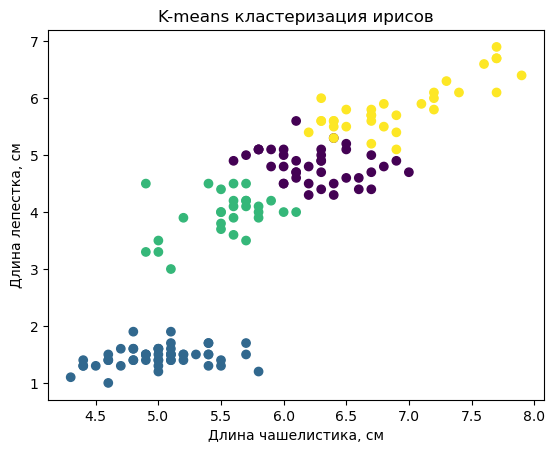

In [34]:
import matplotlib.pyplot as plt

# Визуализация кластеров
plt.scatter(data['SepalLengthCm'],data['PetalLengthCm'], c=labels, cmap='viridis')
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Длина лепестка, см')
plt.title('K-means кластеризация ирисов')
plt.show()

In [35]:
from sklearn.metrics import silhouette_score

# Вычисление внутрикластерного расстояния
inertia = model.inertia_
print(f"Inertia: {inertia}")

# Вычисление коэффициента силуэта
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")

Inertia: 57.31787321428571
Silhouette Score: 0.4978256901095472


### Задание 6. Загрузить ваш dataset и произвести его описание


#### Здесь представлен датасет реальных заказов в Тинькофф Афиша.
#### В нём присутствует данные о номере заказа, дате создания, датах сеансов, id фильма, со скольки лет разрешён вход, оценки фильма, количество билетов и стоимости билетов.

In [39]:
import pandas as pd
my_data=pd.read_excel('C:\\Users\\Данил\\OneDrive\\Desktop\\cinema_successful_orders.xlsx',sheet_name='cinema_successful_orders')
my_data

,order_id,creation_date,session_date,movie_id,movie_age_restriction,movie_rating,number_of_tickets,ticket_price
0,2441412,2020-03-07,2020-03-07,32452,12+,7.70,2,31.645570
1,2169133,2020-02-03,2020-02-04,32452,12+,7.70,4,47.468354
2,2187694,2020-02-06,2020-02-06,32452,12+,7.70,2,23.734177
3,2182225,2020-02-05,2020-02-05,32452,12+,7.70,2,23.734177
4,2209967,2020-02-08,2020-02-12,32452,12+,7.70,3,44.303797
...,...,...,...,...,...,...,...,...
15180,2526705,2020-08-07,2020-08-07,47102,12+,6.45,2,36.392405
15181,2622933,2020-09-19,2020-09-19,38649,12+,0.00,2,77.531646
15182,2615604,2020-09-18,2020-09-18,38649,12+,0.00,1,25.316456
15183,2531379,2020-08-14,2020-08-14,47102,12+,6.45,2,18.987342


In [40]:
my_data = my_data.dropna()
my_data

,order_id,creation_date,session_date,movie_id,movie_age_restriction,movie_rating,number_of_tickets,ticket_price
0,2441412,2020-03-07,2020-03-07,32452,12+,7.70,2,31.645570
1,2169133,2020-02-03,2020-02-04,32452,12+,7.70,4,47.468354
2,2187694,2020-02-06,2020-02-06,32452,12+,7.70,2,23.734177
3,2182225,2020-02-05,2020-02-05,32452,12+,7.70,2,23.734177
4,2209967,2020-02-08,2020-02-12,32452,12+,7.70,3,44.303797
...,...,...,...,...,...,...,...,...
15180,2526705,2020-08-07,2020-08-07,47102,12+,6.45,2,36.392405
15181,2622933,2020-09-19,2020-09-19,38649,12+,0.00,2,77.531646
15182,2615604,2020-09-18,2020-09-18,38649,12+,0.00,1,25.316456
15183,2531379,2020-08-14,2020-08-14,47102,12+,6.45,2,18.987342


In [41]:
my_data = pd.get_dummies(my_data, drop_first=True)
my_data

,order_id,creation_date,session_date,movie_id,movie_rating,number_of_tickets,ticket_price,movie_age_restriction_12+,movie_age_restriction_16+,movie_age_restriction_18+,movie_age_restriction_6+
0,2441412,2020-03-07,2020-03-07,32452,7.70,2,31.645570,True,False,False,False
1,2169133,2020-02-03,2020-02-04,32452,7.70,4,47.468354,True,False,False,False
2,2187694,2020-02-06,2020-02-06,32452,7.70,2,23.734177,True,False,False,False
3,2182225,2020-02-05,2020-02-05,32452,7.70,2,23.734177,True,False,False,False
4,2209967,2020-02-08,2020-02-12,32452,7.70,3,44.303797,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15180,2526705,2020-08-07,2020-08-07,47102,6.45,2,36.392405,True,False,False,False
15181,2622933,2020-09-19,2020-09-19,38649,0.00,2,77.531646,True,False,False,False
15182,2615604,2020-09-18,2020-09-18,38649,0.00,1,25.316456,True,False,False,False
15183,2531379,2020-08-14,2020-08-14,47102,6.45,2,18.987342,True,False,False,False


In [42]:
features = ['order_id', 'movie_id', 'ticket_price']
X = my_data[features]

from sklearn.cluster import KMeans

k = 3

In [43]:
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [44]:
labels = model.labels_

my_data['Cluster'] = labels

print(my_data.head())

   order_id creation_date session_date  movie_id  movie_rating  \
0   2441412    2020-03-07   2020-03-07     32452           7.7   
1   2169133    2020-02-03   2020-02-04     32452           7.7   
2   2187694    2020-02-06   2020-02-06     32452           7.7   
3   2182225    2020-02-05   2020-02-05     32452           7.7   
4   2209967    2020-02-08   2020-02-12     32452           7.7   

   number_of_tickets  ticket_price  movie_age_restriction_12+  \
0                  2     31.645570                       True   
1                  4     47.468354                       True   
2                  2     23.734177                       True   
3                  2     23.734177                       True   
4                  3     44.303797                       True   

   movie_age_restriction_16+  movie_age_restriction_18+  \
0                      False                      False   
1                      False                      False   
2                      False       

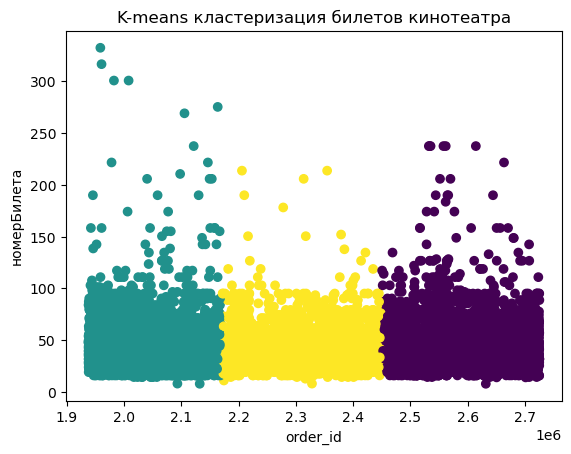

In [46]:
import matplotlib.pyplot as plt

plt.scatter(my_data['order_id'], my_data['ticket_price'], c=labels, cmap='viridis')
plt.xlabel('order_id')
plt.ylabel('номерБилета')
plt.title('K-means кластеризация билетов кинотеатра')
plt.show()